# DataScience: Life expectancy analysis 

# 1. Look at the data

Firstly we must import some libraries for work on a dataset, but I will add libraries or single packages if it necessary

In [1]:
import numpy  as np
import pandas as pd
import seaborn as sns
import sklearn.model_selection
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
import matplotlib.pyplot as plt

Well, read dataset:

In [2]:
dataset = pd.read_csv("Life_expectancy_1.csv", delimiter = ";") 

## First look to the dataset

Dataset size:

In [5]:
dataset.shape

(2938, 13)

Get basic information aboud dataset:

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2938 non-null   object 
 1   Year                    2938 non-null   int64  
 2   Status                  2938 non-null   object 
 3   Adult Mortality         2928 non-null   float64
 4   infant deaths           2938 non-null   int64  
 5   Alcohol                 2744 non-null   float64
 6   percentage expenditure  2938 non-null   float64
 7   Hepatitis B             2385 non-null   float64
 8   Measles                 2938 non-null   int64  
 9    BMI                    2904 non-null   float64
 10  under-five deaths       2938 non-null   int64  
 11  Population              2286 non-null   float64
 12  Life expectancy         2928 non-null   float64
dtypes: float64(7), int64(4), object(2)
memory usage: 298.5+ KB


We can get only columns names

In [7]:
dataset.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Population', 'Life expectancy '],
      dtype='object')

For described statistic we call method **describe()** 

In [8]:
dataset.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Population,Life expectancy
count,2938.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2.286000e+03,2928.000000
mean,2007.518720,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,1.275338e+07,69.224932
std,4.613841,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,6.101210e+07,9.523867
min,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.400000e+01,36.300000
25%,2004.000000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,1.957932e+05,63.100000
50%,2008.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,1.386542e+06,72.100000
75%,2012.000000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,7.420359e+06,75.700000
max,2015.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,1.293859e+09,89.000000


Use heatmap

C:\Users\user\AppData\Local\Temp\ipykernel_3412\2814738461.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


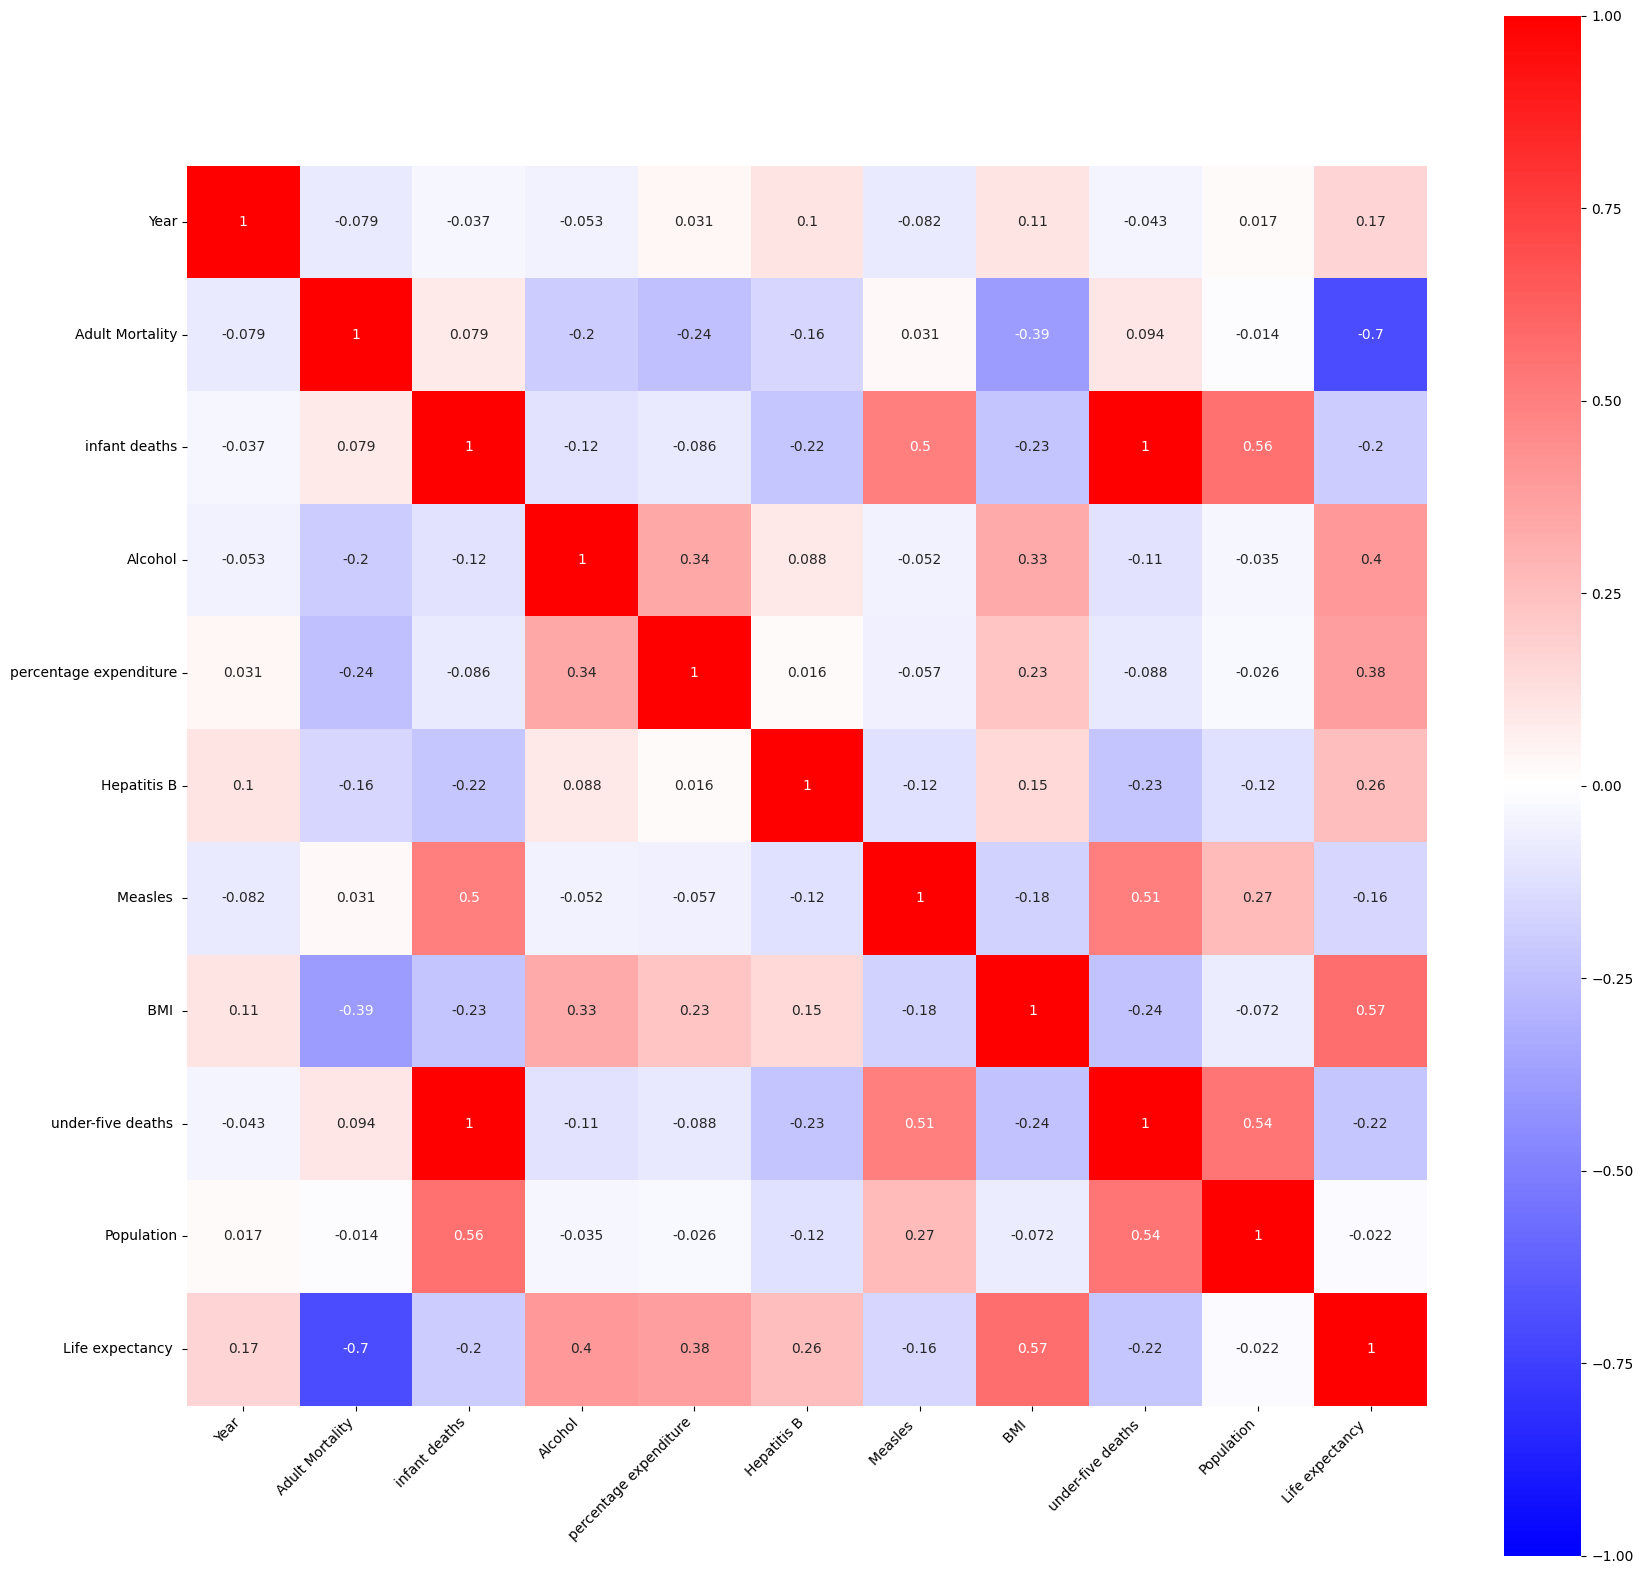

In [9]:
corr = dataset.corr()
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, annot = True,
    cmap="bwr",
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# 2. Data preparation
steps: handling missing values, outliers, irrelevant data,
format, data types, detecting the features and target value, dividing into
train and test sets

### Firstly, let's find out which columns contain missing values

In [10]:
dataset.isnull().sum()

Country                     0
Year                        0
Status                      0
Adult Mortality            10
infant deaths               0
Alcohol                   194
percentage expenditure      0
Hepatitis B               553
Measles                     0
 BMI                       34
under-five deaths           0
Population                652
Life expectancy            10
dtype: int64

### Well, as we see 6 columns have missing/Nan values, so we should drop (delete) 10 nan values from Adult Martality and Life expectancy and 34 rows from BMI, because for 2938 rows records count of these values is not significantly

#### Alcohol, Hepatitis B, Population these columns has many Nan values.

#### data type of Alcohol, Hepatitis B and Population is float, therefore we can fill them with mean value.

For coulmn Adult Mortality, we drop Nan values:

In [11]:
dataset = dataset.dropna(subset = ['Adult Mortality'])

For column BMI, we drop Nan values:

In [12]:
dataset = dataset.dropna(subset = [' BMI '])

For column Life expectancy, we drop Nan values:

In [13]:
dataset = dataset.dropna(subset = ['Life expectancy '])

For column Alcohol, we fill it with mean:

In [14]:
Alcohol_mean = dataset[['Alcohol']].mean()
dataset = dataset.fillna(value=Alcohol_mean)

For coulumn Hepatitis B, we fill it with mean:

In [15]:
HepatitisB_mean = dataset[['Hepatitis B']].mean() 
dataset = dataset.fillna(value=HepatitisB_mean)

For column Population, we fill with mean:

In [16]:
Population_mean = dataset[['Population']].mean() 
dataset = dataset.fillna(value=Population_mean)

So, let's check are there Nan values now?

In [17]:
dataset.isnull().sum()

Country                   0
Year                      0
Status                    0
Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
Hepatitis B               0
Measles                   0
 BMI                      0
under-five deaths         0
Population                0
Life expectancy           0
dtype: int64

Check with heatmap:

<AxesSubplot: >

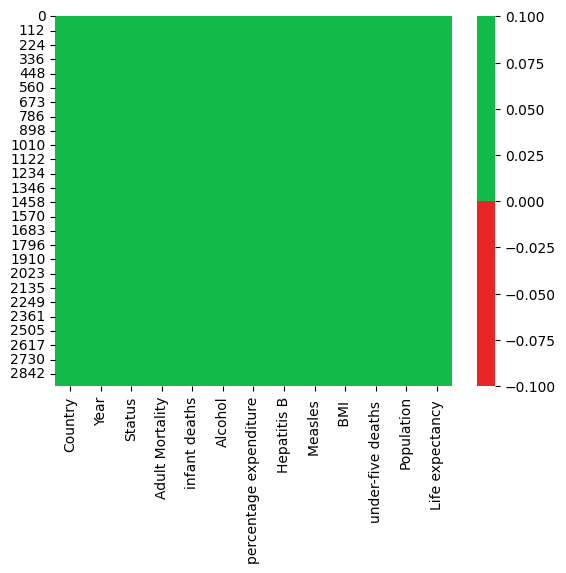

In [18]:
columns = dataset.columns # columns
colours = ['#e82626', '#12ba4a'] # specify the colours - green is fill. red is not fill.
sns.heatmap(dataset[columns].isnull(), cmap=sns.color_palette(colours))

#### Well, now we do not have missing values

### Secondly, let's check outliers
We have several ways for see outliers: 
    
    Using scatter plots
    Box plot
    Using Z score
    IQR
But i will use only box plot (for visualization) and IQR (for delete), because they are good combination for finding and delete outliers.

Use %matplotlib inline command is used to visualize static matplotlib plots in Jupyter Notebook.

In [19]:
%matplotlib inline

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2896 entries, 0 to 2937
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2896 non-null   object 
 1   Year                    2896 non-null   int64  
 2   Status                  2896 non-null   object 
 3   Adult Mortality         2896 non-null   float64
 4   infant deaths           2896 non-null   int64  
 5   Alcohol                 2896 non-null   float64
 6   percentage expenditure  2896 non-null   float64
 7   Hepatitis B             2896 non-null   float64
 8   Measles                 2896 non-null   int64  
 9    BMI                    2896 non-null   float64
 10  under-five deaths       2896 non-null   int64  
 11  Population              2896 non-null   float64
 12  Life expectancy         2896 non-null   float64
dtypes: float64(7), int64(4), object(2)
memory usage: 316.8+ KB


<AxesSubplot: >

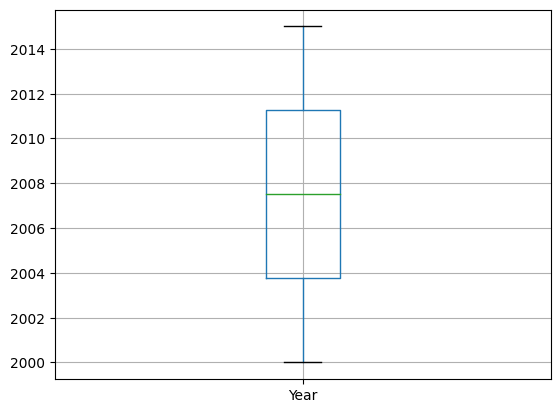

In [21]:
dataset.boxplot("Year")

No outliers

<AxesSubplot: >

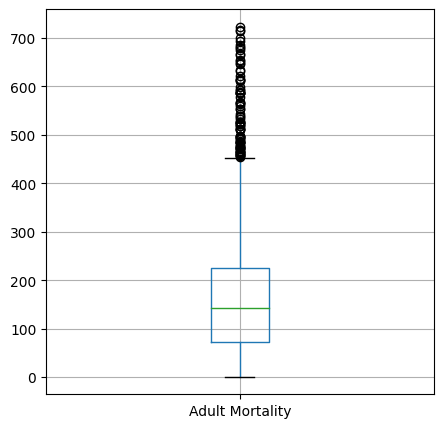

In [22]:
dataset.boxplot("Adult Mortality", figsize = (5, 5))

We see outliers, so we should see how many outliers then delete them

In [23]:
print("Old Shape: ", dataset.shape, '\n')

# Find IQR
Q1 = np.percentile(dataset['Adult Mortality'], 25, method='midpoint')
print("Q1 = ", Q1)
Q3 = np.percentile(dataset['Adult Mortality'], 75, method='midpoint')
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ", IQR, '\n')

# Above Upper bound
upper = Q3 + 1.5 * IQR
upper_array = dataset['Adult Mortality'][dataset['Adult Mortality'] >= upper]
print("Upper Bound: " , upper)
print("Upper array size: ", upper_array.size, '\n')
#Below Lower bound
lower = Q1 - 1.5 * IQR
lower_array=dataset['Adult Mortality'][dataset['Adult Mortality'] <= lower]
print("Lower Bound: ", lower)
print("Lower array size: ", lower_array.size, '\n')

dataset.drop(upper_array.index,inplace=True)
dataset.drop(lower_array.index,inplace=True)

print("New Shape: ", dataset.shape)

Old Shape:  (2896, 13) 

Q1 =  73.0
Q3 =  225.0
IQR =  152.0 

Upper Bound:  453.0
Upper array size:  88 

Lower Bound:  -155.0
Lower array size:  0 

New Shape:  (2808, 13)


So we calculate Q1, Q3, IQR, Lower and Upper then create two arrays for outliers and delete them.

<AxesSubplot: >

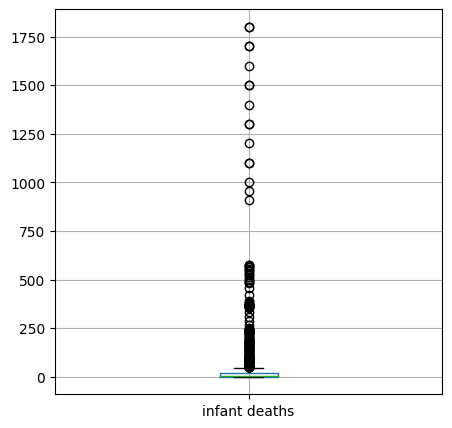

In [24]:
dataset.boxplot("infant deaths", figsize = (5, 5))

We have many outliers,so upper board will be 90

In [25]:
print("Old Shape: ", dataset.shape, '\n')

# Find IQR
Q1 = np.percentile(dataset['infant deaths'], 25, method='midpoint')
print("Q1 = ", Q1)
Q3 = np.percentile(dataset['infant deaths'], 90, method='midpoint')
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ", IQR, '\n')

# Above Upper bound
upper = Q3 + 1.5 * IQR
upper_array = dataset['infant deaths'][dataset['infant deaths'] >= upper]
print("Upper Bound: " , upper)
print("Upper array size: ", upper_array.size, '\n')
#Below Lower bound
lower = Q1 - 1.5 * IQR
lower_array=dataset['infant deaths'][dataset['infant deaths'] <= lower]
print("Lower Bound: ", lower)
print("Lower array size: ", lower_array.size, '\n')

dataset.drop(upper_array.index,inplace=True)
dataset.drop(lower_array.index,inplace=True)

print("New Shape: ", dataset.shape)

Old Shape:  (2808, 13) 

Q1 =  0.0
Q3 =  56.0
IQR =  56.0 

Upper Bound:  140.0
Upper array size:  114 

Lower Bound:  -84.0
Lower array size:  0 

New Shape:  (2694, 13)


Use it for every numeric column

<AxesSubplot: >

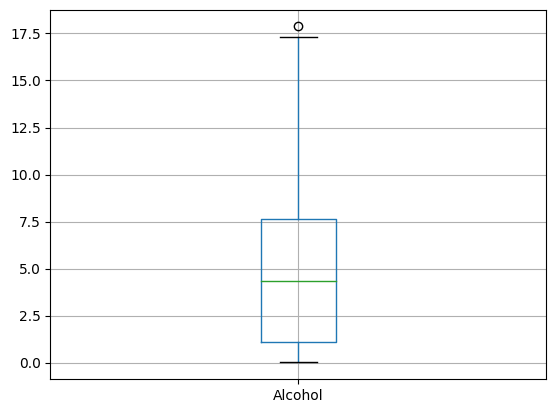

In [26]:
dataset.boxplot("Alcohol")

In [27]:
print("Old Shape: ", dataset.shape, '\n')

# Find IQR
Q1 = np.percentile(dataset['Alcohol'], 25, method='midpoint')
print("Q1 = ", Q1)
Q3 = np.percentile(dataset['Alcohol'], 75, method='midpoint')
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ", IQR, '\n')

# Above Upper bound
upper = Q3 + 1.5 * IQR
upper_array = dataset['Alcohol'][dataset['Alcohol'] >= upper]
print("Upper Bound: " , upper)
print("Upper array size: ", upper_array.size, '\n')
#Below Lower bound
lower = Q1 - 1.5 * IQR
lower_array=dataset['Alcohol'][dataset['Alcohol'] <= lower]
print("Lower Bound: ", lower)
print("Lower array size: ", lower_array.size, '\n')

dataset.drop(upper_array.index,inplace=True)
dataset.drop(lower_array.index,inplace=True)

print("New Shape: ", dataset.shape)

Old Shape:  (2694, 13) 

Q1 =  1.11
Q3 =  7.625
IQR =  6.515 

Upper Bound:  17.3975
Upper array size:  1 

Lower Bound:  -8.6625
Lower array size:  0 

New Shape:  (2693, 13)


<AxesSubplot: >

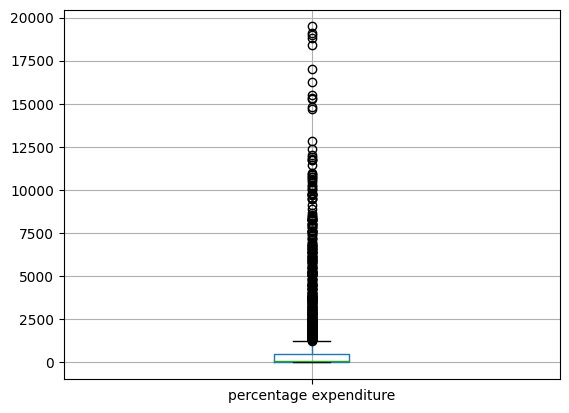

In [28]:
dataset.boxplot("percentage expenditure")

We have many outliers,so upper board will be 90

In [29]:
print("Old Shape: ", dataset.shape, '\n')

# Find IQR
Q1 = np.percentile(dataset['percentage expenditure'], 25, method='midpoint')
print("Q1 = ", Q1)
Q3 = np.percentile(dataset['percentage expenditure'], 90, method='midpoint')
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ", IQR, '\n')

# Above Upper bound
upper = Q3 + 1.5 * IQR
upper_array = dataset['percentage expenditure'][dataset['percentage expenditure'] >= upper]
print("Upper Bound: " , upper)
print("Upper array size: ", upper_array.size, '\n')
#Below Lower bound
lower = Q1 - 1.5 * IQR
lower_array=dataset['percentage expenditure'][dataset['percentage expenditure'] <= lower]
print("Lower Bound: ", lower)
print("Lower array size: ", lower_array.size, '\n')

dataset.drop(upper_array.index,inplace=True)
dataset.drop(lower_array.index,inplace=True)

print("New Shape: ", dataset.shape)

Old Shape:  (2693, 13) 

Q1 =  5.397368532000001
Q3 =  2052.0708455000004
IQR =  2046.6734769680004 

Upper Bound:  5122.081060952001
Upper array size:  130 

Lower Bound:  -3064.6128469200003
Lower array size:  0 

New Shape:  (2563, 13)


<AxesSubplot: >

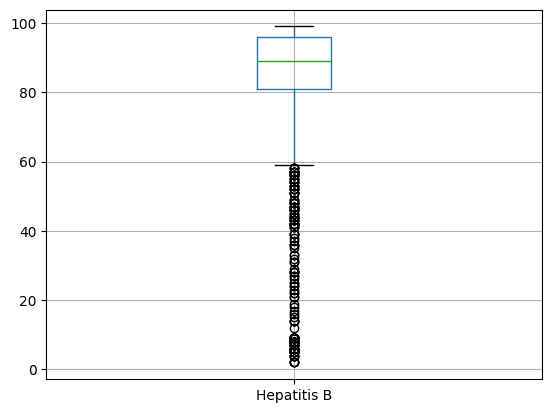

In [30]:
dataset.boxplot("Hepatitis B")

We have many outliers,so lower board will be 10

In [31]:
print("Old Shape: ", dataset.shape, '\n')

# Find IQR
Q1 = np.percentile(dataset['Hepatitis B'], 10, method='midpoint')
print("Q1 = ", Q1)
Q3 = np.percentile(dataset['Hepatitis B'], 75, method='midpoint')
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ", IQR, '\n')

# Above Upper bound
upper = Q3 + 1.5 * IQR
upper_array = dataset['Hepatitis B'][dataset['Hepatitis B'] >= upper]
print("Upper Bound: " , upper)
print("Upper array size: ", upper_array.size, '\n')
#Below Lower bound
lower = Q1 - 1.5 * IQR
lower_array=dataset['Hepatitis B'][dataset['Hepatitis B'] <= lower]
print("Lower Bound: ", lower)
print("Lower array size: ", lower_array.size, '\n')

dataset.drop(upper_array.index,inplace=True)
dataset.drop(lower_array.index,inplace=True)

print("New Shape: ", dataset.shape)

Old Shape:  (2563, 13) 

Q1 =  60.0
Q3 =  96.0
IQR =  36.0 

Upper Bound:  150.0
Upper array size:  0 

Lower Bound:  6.0
Lower array size:  26 

New Shape:  (2537, 13)


<AxesSubplot: >

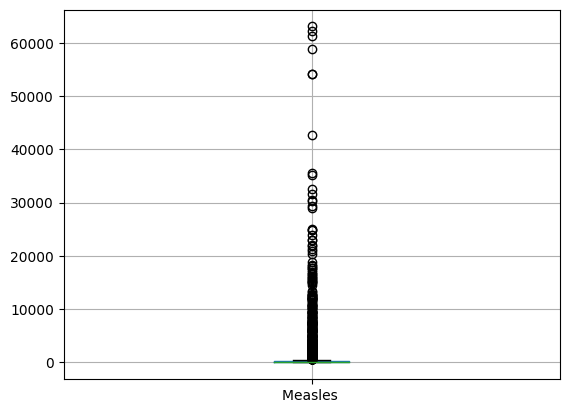

In [32]:
dataset.boxplot("Measles ")

We have many outliers,so upper board will be 90

In [33]:
print("Old Shape: ", dataset.shape, '\n')

# Find IQR
Q1 = np.percentile(dataset['Measles '], 25, method='midpoint')
print("Q1 = ", Q1)
Q3 = np.percentile(dataset['Measles '], 90, method='midpoint')
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ", IQR, '\n')

# Above Upper bound
upper = Q3 + 1.5 * IQR
upper_array = dataset['Measles '][dataset['Measles '] >= upper]
print("Upper Bound: " , upper)
print("Upper array size: ", upper_array.size, '\n')
#Below Lower bound
lower = Q1 - 1.5 * IQR
lower_array=dataset['Measles '][dataset['Measles '] <= lower]
print("Lower Bound: ", lower)
print("Lower array size: ", lower_array.size, '\n')

dataset.drop(upper_array.index,inplace=True)
dataset.drop(lower_array.index,inplace=True)

print("New Shape: ", dataset.shape)

Old Shape:  (2537, 13) 

Q1 =  0.0
Q3 =  2024.5
IQR =  2024.5 

Upper Bound:  5061.25
Upper array size:  145 

Lower Bound:  -3036.75
Lower array size:  0 

New Shape:  (2392, 13)


<AxesSubplot: >

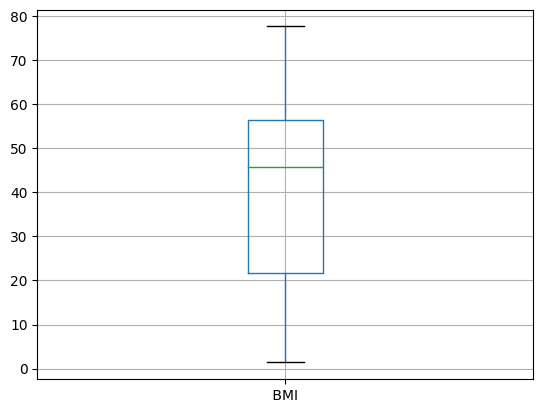

In [34]:
dataset.boxplot(" BMI ")

No outliers

<AxesSubplot: >

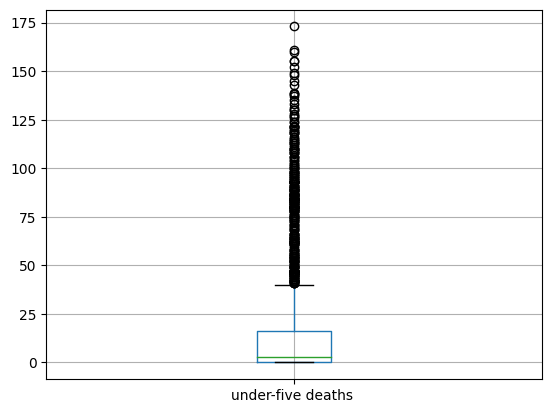

In [35]:
dataset.boxplot("under-five deaths ")

We have many outliers,so upper board will be 90

In [36]:
print("Old Shape: ", dataset.shape, '\n')

# Find IQR
Q1 = np.percentile(dataset['under-five deaths '], 25, method='midpoint')
print("Q1 = ", Q1)
Q3 = np.percentile(dataset['under-five deaths '], 90, method='midpoint')
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ", IQR, '\n')

# Above Upper bound
upper = Q3 + 1.5 * IQR
upper_array = dataset['under-five deaths '][dataset['under-five deaths '] >= upper]
print("Upper Bound: " , upper)
print("Upper array size: ", upper_array.size, '\n')
#Below Lower bound
lower = Q1 - 1.5 * IQR
lower_array=dataset['under-five deaths '][dataset['under-five deaths '] <= lower]
print("Lower Bound: ", lower)
print("Lower array size: ", lower_array.size, '\n')

dataset.drop(upper_array.index,inplace=True)
dataset.drop(lower_array.index,inplace=True)

print("New Shape: ", dataset.shape)

Old Shape:  (2392, 13) 

Q1 =  0.0
Q3 =  52.5
IQR =  52.5 

Upper Bound:  131.25
Upper array size:  16 

Lower Bound:  -78.75
Lower array size:  0 

New Shape:  (2376, 13)


<AxesSubplot: >

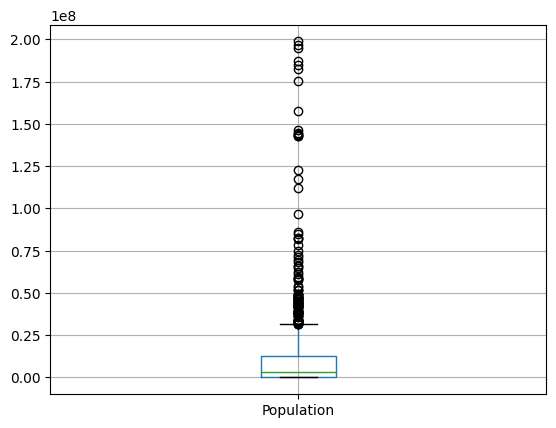

In [37]:
dataset.boxplot("Population")

In [38]:
print("Old Shape: ", dataset.shape, '\n')

# Find IQR
Q1 = np.percentile(dataset['Population'], 25, method='midpoint')
print("Q1 = ", Q1)
Q3 = np.percentile(dataset['Population'], 90, method='midpoint')
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ", IQR, '\n')

# Above Upper bound
upper = Q3 + 1.5 * IQR
upper_array = dataset['Population'][dataset['Population'] >= upper]
print("Upper Bound: " , upper)
print("Upper array size: ", upper_array.size, '\n')
#Below Lower bound
lower = Q1 - 1.5 * IQR
lower_array=dataset['Population'][dataset['Population'] <= lower]
print("Lower Bound: ", lower)
print("Lower array size: ", lower_array.size, '\n')

dataset.drop(upper_array.index,inplace=True)
dataset.drop(lower_array.index,inplace=True)

print("New Shape: ", dataset.shape)

Old Shape:  (2376, 13) 

Q1 =  349756.0
Q3 =  14871287.0
IQR =  14521531.0 

Upper Bound:  36653583.5
Upper array size:  97 

Lower Bound:  -21432540.5
Lower array size:  0 

New Shape:  (2279, 13)


<AxesSubplot: >

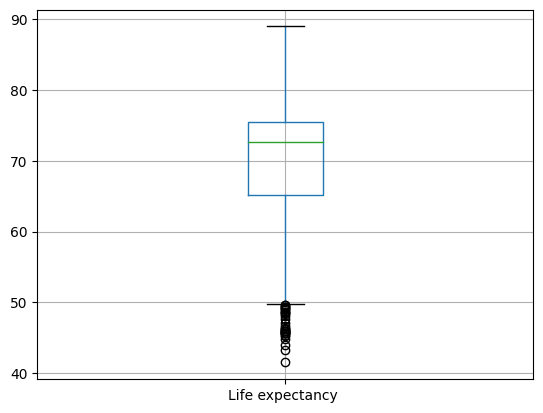

In [39]:
 dataset.boxplot("Life expectancy ")

In [40]:
print("Old Shape: ", dataset.shape, '\n')

# Find IQR
Q1 = np.percentile(dataset['Life expectancy '], 25, method='midpoint')
print("Q1 = ", Q1)
Q3 = np.percentile(dataset['Life expectancy '], 90, method='midpoint')
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ", IQR, '\n')

# Above Upper bound
upper = Q3 + 1.5 * IQR
upper_array = dataset['Life expectancy '][dataset['Life expectancy '] >= upper]
print("Upper Bound: " , upper)
print("Upper array size: ", upper_array.size, '\n')
#Below Lower bound
lower = Q1 - 1.5 * IQR
lower_array=dataset['Life expectancy '][dataset['Life expectancy '] <= lower]
print("Lower Bound: ", lower)
print("Lower array size: ", lower_array.size, '\n')

dataset.drop(upper_array.index,inplace=True)
dataset.drop(lower_array.index,inplace=True)

print("New Shape: ", dataset.shape)

Old Shape:  (2279, 13) 

Q1 =  65.15
Q3 =  79.0
IQR =  13.849999999999994 

Upper Bound:  99.77499999999999
Upper array size:  0 

Lower Bound:  44.375000000000014
Lower array size:  3 

New Shape:  (2276, 13)


### Thirdly,  we have only one column with type object (String), it is Status column, we can encode them to integer type, i will use LabelEncoder.

In [41]:
from sklearn.preprocessing import LabelEncoder 
dataset['Status'] = LabelEncoder().fit_transform(dataset['Status'])

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2276 entries, 0 to 2935
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2276 non-null   object 
 1   Year                    2276 non-null   int64  
 2   Status                  2276 non-null   int32  
 3   Adult Mortality         2276 non-null   float64
 4   infant deaths           2276 non-null   int64  
 5   Alcohol                 2276 non-null   float64
 6   percentage expenditure  2276 non-null   float64
 7   Hepatitis B             2276 non-null   float64
 8   Measles                 2276 non-null   int64  
 9    BMI                    2276 non-null   float64
 10  under-five deaths       2276 non-null   int64  
 11  Population              2276 non-null   float64
 12  Life expectancy         2276 non-null   float64
dtypes: float64(7), int32(1), int64(4), object(1)
memory usage: 240.0+ KB


In [43]:
dataset.head(10)

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Population,Life expectancy
0,Afghanistan,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,83,33736494.0,65.0
1,Afghanistan,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,86,327582.0,59.9
2,Afghanistan,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,89,31731688.0,59.9
3,Afghanistan,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,93,3696958.0,59.5
4,Afghanistan,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,97,2978599.0,59.2
5,Afghanistan,2010,1,279.0,74,0.01,79.679367,66.0,1989,16.7,102,2883167.0,58.8
6,Afghanistan,2009,1,281.0,77,0.01,56.762217,63.0,2861,16.2,106,284331.0,58.6
7,Afghanistan,2008,1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,2729431.0,58.1
8,Afghanistan,2007,1,295.0,82,0.02,10.910156,63.0,1141,15.2,113,26616792.0,57.5
9,Afghanistan,2006,1,295.0,84,0.03,17.171518,64.0,1990,14.7,116,2589345.0,57.3


# In our dataset we don't have irrelevant data, also columns has appropriate format and data type for model training

 Notation: Label encoder problem: For example 1 > 0 is true, but 'Developing' is no more than 'Developed', we didn't originally have such a comparison.  

# The last, detecting the features and target value, dividing into train and test sets

Target value will be **Life expectancy**, because all other columns affect it in one way or another


In [44]:
dataset.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Population', 'Life expectancy '],
      dtype='object')

In [45]:
features=dataset[['Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Population']]
target=dataset['Life expectancy ']

In [46]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2276 entries, 0 to 2935
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    2276 non-null   int64  
 1   Status                  2276 non-null   int32  
 2   Adult Mortality         2276 non-null   float64
 3   infant deaths           2276 non-null   int64  
 4   Alcohol                 2276 non-null   float64
 5   percentage expenditure  2276 non-null   float64
 6   Hepatitis B             2276 non-null   float64
 7   Measles                 2276 non-null   int64  
 8    BMI                    2276 non-null   float64
 9   under-five deaths       2276 non-null   int64  
 10  Population              2276 non-null   float64
dtypes: float64(6), int32(1), int64(4)
memory usage: 204.5 KB


In [47]:
target.info()

<class 'pandas.core.series.Series'>
Int64Index: 2276 entries, 0 to 2935
Series name: Life expectancy 
Non-Null Count  Dtype  
--------------  -----  
2276 non-null   float64
dtypes: float64(1)
memory usage: 35.6 KB


I will give the training set 30% of the whole dataset, 30/70 would be a good ratio for model building:

In [48]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=20)

In [49]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1593, 11), (1593,), (683, 11), (683,))

# 3. Model training and improvement

### 3.1a Determine the target value for linear regression model and train LinearRegression() model, use MSE and r2_score metrics

Using our train and test sets we create linear regression model:

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()

X = dataset.drop(["Life expectancy "], axis=1)
y = dataset["Life expectancy "]

lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 19.6401492136082
R-squared (R2): 0.708209133384407


 - In this case, the MSE of 19.64 indicates that the mean square difference between predicted Life expectancy and actual Life expectancy is about 1964
 - An R2 of about 0.7082 shows that the model explains 70.82% of the variance of the target variable.
 - The low MSE and high R2 indicate that the model does a good job of predicting the target variable. 

In [51]:
predictions = lr_model.predict(x_test)

y_test.reshape(6282, 11)

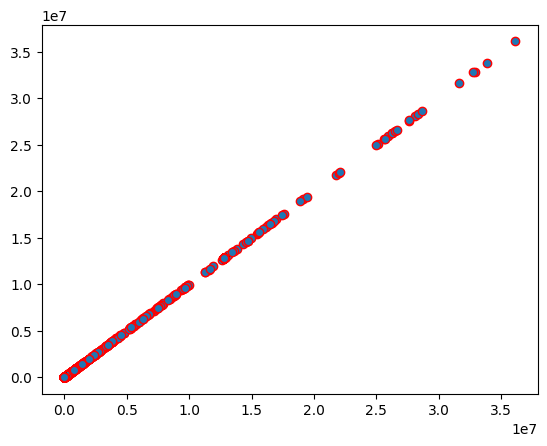

In [53]:
import matplotlib.pyplot as plt

plt.scatter(x_test, x_test, edgecolor = 'r')

### 3.2 Improve the models 

In [54]:
lr_model.coef_

array([ 1.73239387e-01, -4.00295377e+00, -2.67680145e-02,  4.53741002e-01,
        1.42099322e-01,  1.15662994e-03,  1.17091925e-02, -2.69865677e-04,
        7.06055475e-02, -4.06254201e-01,  1.17158402e-07])

In [55]:
lr_model.intercept_

-274.67068438382

In [56]:
from sklearn.model_selection import cross_val_score
lasso = linear_model.Lasso()

In [57]:
print(cross_val_score(lasso, features, target, cv=5))

[0.76906802 0.57317608 0.56833019 0.61622313 0.56531914]


# Summary

## In this paper, we first received a dataset from the hospital about heart disease

## 1. We received information about the dataset
## 2. We filled in/deleted the missing values
## 3. Deleted Outliers
## 4.  Encoded string values. 
## 5.  Divided dataset into training and training
## 6. Later we tried to build a linear regression and improve the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.drop(['Life expectancy '], axis=1)
y = df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)